<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 4** 

- Dependence and correlations
- Sampling from Gaussians 
- Method of Least Squares

<hr/>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h1><font color="darkblue">Bivariate and Multivariate</font></h1>
<hr/>

### Dependence
- Consider two random variables $X$, $Y\in\mathbb{R}$

> We can look at them separately but ...
>
> Are they "related" at all?

- Dependent variables

>$\displaystyle P(X, Y) \neq P(X)\,P(Y)$ 
> 
>More on this later...

### Covariance

- Definition 

>$\displaystyle \mathbb{Cov}[X,Y]=\mathbb{E}\Big[\big(X-\mathbb{E}[X]\big)\big(Y-\mathbb{E}[Y]\big)\Big]$  
>
> Other notations: $\mathrm{C}_{X,Y}$, $\sigma(X,Y)$, ...

- Sample covariance

>$\displaystyle C = \frac{1}{N\!-\!1}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})$

> In order to have an unbised estiamte, the denominator is $N-1$ rather than $N$. The reason is due to a variant of **Bessel's correction**: In short, the sample covariance relies on the difference between each observation and the sample mean, but the sample mean is slightly correlated with each observation since it is defined in terms of all observations.

### Quiz

1) If $X$ and $Y$ are independent, are they also uncorrelated?

        [ ] Yes      [ ] No
        
2) If $X$ and $Y$ are uncorrelated, are they also independent?

        [ ] Yes      [ ] No

### Answers

1) If $X$ and $Y$ are independent, are they also uncorrelated?

        [x] Yes      [ ] No

> By independence we have 
>
> $ \mathbb{E}[XY]=\mathbb{E}[X]\ \mathbb{E}[Y]$
>
> Recall the [linearity of the expectation](https://en.wikipedia.org/wiki/Expected_value#Linearity), we have
>
> $ \mathbb{E}[aX+bY]=a \mathbb{E}[X] + b \mathbb{E}[Y]$
>
> Let $ \mathbb{E}[X] = \mu_X $ and $ \mathbb{E}[Y] = \mu_Y $, then we have the covariance as
>
>$ \mathbb{E}[ (X\!-\!\mu_X)(Y\!-\!\mu_Y) ] = \mathbb{E}[ XY - X \mu_y - \mu_X Y  + \mu_X\mu_Y] = \mathbb{E}[ XY ] -\mu_Y \mathbb{E}[X] - \mu_X \mathbb{E}[Y]  + \mu_X\mu_Y = 0$

2) If $X$ and $Y$ are uncorrelated, are they also independent?

        [ ] Yes      [x] No


> For example, let random variable $X$ have a normal distribution, $X\sim{}{\cal{}N}(0,1)$, and let $Y=X^2$. They are clearly dependent.
>
> Recall that the Skewness of normal is 0 (c.f. Lecutre Note 02 and [here](https://en.wikipedia.org/wiki/Normal_distribution)), i.e.
>
> $\displaystyle \mathbb{E}\left[\left(\frac{X\!-\!\mu}{\sigma}\right)^3\right] = \mathbb{E}\left[\left(\frac{X\!-\!0}{1}\right)^3\right] = \mathbb{E}[X^3] = 0 $
>
> Then we have
>
>$\mathbb{E}[ (X\!-\!0)(X^2\!-\!\mu_{X^2}) ] = \mathbb{E}[X^3-X\,\mu_{X^2}] $ $= \mathbb{E}[X^3] - \mathbb{E}[X]\,\mu_{X^2} = 0 - 0 = 0 $ 

**Rule of thumb**: in general, zero correlation dose **NOT** imply independence

**More intuition**: correlation meausres **linear** assoiaiton between two given random variables and it has no obligation to detect any other form of associaiton. Since two random variables could be associated in non-linear ways (such as $X$ vs. $X^2$ in the above case) and correlation could not distinguish from indepdendent case.

### More Examples about Correlation 

- How it could look like for different correlation

<img src="files/600px-Correlation_examples2.svg.png" width=500 align="left">



### Vector Notation

- Let $\boldsymbol{V}$ represent the 2-vector of random scalar variables $X$ and $Y$

>$\boldsymbol{V} = \begin{pmatrix}X\\Y\end{pmatrix}$

- Mean

>$\displaystyle \mathbb{E}[\boldsymbol{V}] = \begin{pmatrix}\mathbb{E}[X]\\\mathbb{E}[Y]\end{pmatrix} = \begin{pmatrix}\mu_X\\\mu_Y\end{pmatrix}$

- Covariance matrix

>$\displaystyle \Sigma(\boldsymbol{V}) = \mathbb{E}\Big[\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)^T\Big]$ $ = \left( \begin{array}{ccc}
\sigma_X^2 & \mathrm{C}_{X,Y}  \\
\mathrm{C}_{Y,X} & \sigma_Y^2  \end{array} \right) = \left( \begin{array}{ccc}
\sigma_X^2 & \mathrm{C}_{X,Y}  \\
\mathrm{C}_{X,Y} & \sigma_Y^2  \end{array} \right)$
>
> where $ \mathrm{C}_{X,Y} = \mathrm{C}_{Y,X} = \mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]$. Same generalization of variance works in any dimensions.

### Bivariate Normal Distribution
- Independent and uncorrelated

>$ \displaystyle {\cal N}(x,y;\mu_x,\mu_y,\sigma_x,\sigma_y) = \frac{1}{2 \pi \sigma_x \sigma_y}\ \exp\left[-\frac{(x\!-\!\mu_x)^2}{2\sigma_x^2} -\frac{(y\!-\!\mu_y)^2}{2\sigma_y^2} \right] $

- In general for 2-vector $\boldsymbol{x}$

>$ \displaystyle{\cal N}(\boldsymbol{x};\boldsymbol{\mu},\Sigma) = \frac{1}{2\pi \lvert \Sigma \rvert^{\frac{1}{2}} }\ \exp\left[-\frac{1}{2} (\boldsymbol{x}\!-\!\boldsymbol{\mu})^T \Sigma^{-1} (\boldsymbol{x}\!-\!\boldsymbol{\mu})\right]$
>
> where $\lvert \Sigma \rvert$ is the determinant - other notation $\det\Sigma$ or $\det\!\left(\Sigma\right)$

- Uncorrelated if

>$ \displaystyle \Sigma = \left( \begin{array}{ccc}
\sigma_X^2 & 0  \\
0 & \sigma_Y^2  \end{array} \right)$

- **Exception**: If two random variables are **jointly** normally distributed, i.e., bivariate normal distribution, zero correlation implies independence. Note that two random variables that are both marginally normally distributed **DO NOT** imply they are jointly normally distributed.

### Multivariate Normal Distribution

- In $k$ dimensions - not bold but $k$-vectors


>$ \displaystyle{\cal N}(x;\mu,\Sigma) = \frac{1}{\sqrt{(2\pi)^{k} \lvert \Sigma \rvert} }\ \exp\left[-\frac{1}{2} (x\!-\!\mu)^T \Sigma^{-1} (x\!-\!\mu)\right]$

- [More information on multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)

### Sampling from Gaussians
- Uncorrelated ${\cal N}(0,I)$: Box-Muller transform 

> Using 2 uniform randoms between 0 and 1
>
>$ Z_1 = \sqrt{-2\ln U_1}\,\cos\big(2\pi U_2\big)$ 
>
>$ Z_2 = \sqrt{-2\ln U_1}\,\sin\big(2\pi U_2\big)$ 

- Tranform: scale, rotate, shift

- Derivation of the Box-Muller transform

> If $Z_1$ and $Z_2$ are jointly normally distributed ${\cal N}(0,I)$, we have $Z_1 = R\cos(\theta)$ and $Z_2 = R\sin(\theta)$, where $R^2 \sim \exp(1/2)$ and $\theta\sim Unif(0,2\pi)$. To generate $R$, we use a uniform random variable $U_1\sim Unif(0,1)$ and set $R=\sqrt{-2\ln U_1}$. To generate $\theta$, we use a uniform random variable $U_2 \sim Unif(0,1)$ and set $\theta=2\pi U_2$.

### Quick Review of Statistics in Python

In [2]:
from scipy import stats

- **Random Variables**

> The main public methods for continuous RVs are:
- rvs: Random Variates
- pdf: Probability Density Function
- cdf: Cumulative Distribution Function
- sf: Survival Function (1-CDF)
- ppf: Percent Point Function (Inverse of CDF)
- isf: Inverse Survival Function (Inverse of SF)
- stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
- moment: non-central moments of the distribution

In [3]:
# Use normal distribution as an example
from scipy.stats import norm

In [4]:
# Generate 5 samples from N(0,1)
norm.rvs(loc=0, scale=1, size=5, random_state=2018)  # loc is the mean, scale is the standard deviation  

array([-0.2767676 ,  0.581851  ,  2.14839926, -1.279487  ,  0.50227689])

In [5]:
# If we use the same `random_state`, we will get the same result every time (one thing to remember for reproducibility)
norm.rvs(loc=0, scale=1, size=5, random_state=2018)

array([-0.2767676 ,  0.581851  ,  2.14839926, -1.279487  ,  0.50227689])

In [6]:
# Generate 9 x 2 vectors 
norm.rvs(loc=0, scale=1, size=(9,2), random_state=2018)

array([[-0.2767676 ,  0.581851  ],
       [ 2.14839926, -1.279487  ],
       [ 0.50227689,  0.8560293 ],
       [-0.14279008,  0.11007867],
       [-0.68806479,  0.43356408],
       [ 0.510221  , -0.16513097],
       [-1.35177905,  0.54663075],
       [ 1.23065512,  1.0764461 ],
       [-1.21062488, -0.30667657]])

In [7]:
# Calculate the PDF of N(0,1) on 0 and 2
norm.pdf([0, 2], loc=0, scale=1)

array([ 0.39894228,  0.05399097])

In [8]:
# Calculate CDF of N(0,1) on 0 and 1
norm.cdf([0, 1], loc=0, scale=1)

array([ 0.5       ,  0.84134475])

- [More about `scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- [More about `scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

### Example

In [9]:
from scipy.stats import norm as gaussian

[ 1.92136942  4.90878625]
(2,)


array([ 1.92136942,  4.90878625])

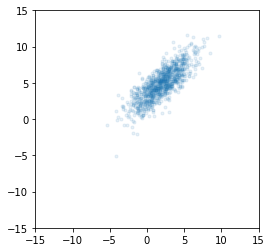

In [10]:
# Generate many 2D (column) vectors
X = gaussian.rvs(0,1,(2,1000))

# Scale axis 0
X[0,:] *= 3 

# Rotate by f
f = +pi/4    
R = array([[cos(f),-sin(f)],
           [sin(f), cos(f)]]) 
V = R.dot(X)

# Shift with a vector
V += np.array([[2],
               [5]]) 

# Plot on square figure
figure(figsize=(4,4));                 # Modify the size of the plot
a=15; xlim(-a,a); ylim(-a,a)           # Modify the range of x and y axis
plot(V[0,:],V[1,:], '.', alpha=0.1)    # alpha is the dot size

# Sample mean
averages = mean(V, axis=1) # compute the row mean
print (averages)
print (averages.shape)
averages

In [11]:
#avg = averages.reshape(averages.size,1)
avg = averages[:,np.newaxis] 
print ("Average: ")
print (avg)

# Sample covariance matrix
print ("Cov:")
print (np.dot(V-avg, (V-avg).T) / (V[0,:].size-1))

Average: 
[[ 1.92136942]
 [ 4.90878625]]
Cov:
[[ 4.77826238  3.87392263]
 [ 3.87392263  4.84209094]]


- `np.newaxis` (c.f. [Indexing in Python](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html))

<h1><font color="darkblue">Method of Least Squares</font></h1>
<hr/>

### The Idea

- Fit a model to training set $\big\{ (x_i, y_i) \big\}$

> Parameterized function $f(x;\theta)$, where $\theta$ can represent multiple parameters

- Minimize the mean or sum of square errors or residuals (SSE, SSR, MSE, MSR?)

> Residual   
>$r_i(\theta) = y_i - f(x_i;\theta)$
>
> Estimation  
>$\displaystyle \hat{\theta} = \arg\min_{\theta} \sum_{i=1}^N \big[y_i-f(x_i;\theta)\big]^2$
 
- Optimization is simple for certain models

### The Simplest Case
- Fitting a constant? Model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \big(y_i\!-\!\mu\big)^2$

- Derivative $C'= dC \big/ d\mu$ vanishes at solution $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i=1}^N \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i=1}^N y_i - N \hat{\mu} = 0 $
>
>$\displaystyle \hat{\mu} = \frac{1}{N}\sum_{i=1}^N y_i \ \ \ \ \ $  -  average

### Heteroscedasticity
- Same model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \frac{\big(y_i\!-\!\mu\big)^2}{\sigma_i^2} $
>
> with  $\ w_i=1 \big/ \sigma_i^2$
>
>$\displaystyle  C(\mu) = \sum_{i=1}^N w_i\big(y_i\!-\!\mu\big)^2 $

- Derivative $C'= dC \big/ d\mu$ vanishes at solution $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i=1}^N w_i \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i=1}^N w_i y_i - \hat{\mu}\sum_{i=1}^N w_i  = 0 $
>
>$\displaystyle \hat{\mu} = \frac{\sum_{i=1}^N w_i y_i}{\sum_{i=1}^N w_i} \ \ \ \ \ \ $ - weighted average (**intuition**: put more weights on points with small $\sigma_i^2$ and less weights on points with large $\sigma_i^2$).

### Simple Fitting
- A linear model with $\boldsymbol{\theta}=(a,b)^T$ parametrization $f(x;\boldsymbol{\theta}) = a + b\,x$
  
>$\displaystyle \hat{\boldsymbol\theta} = \arg\min_\boldsymbol{\theta} \sum_{i=1}^N \big[y_i-(a + b\,x_i)\big]^2$

- Derivatives w.r.t. $a$ and $b$ should vanish at solution $\hat{a}$ and $\hat{b}$

> We have 2 variables and 2 equations

> Quadratic becomes linear $\rightarrow$ analytic solution!

#### Unhomework

0. Derive the best fit parameters of $(a,b)$

### Linear Regression
- A linear combination of known $\phi_k(\cdot)$ functions (basis functions)

>$\displaystyle f(x;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(x) $

> It's a dot product

>$\displaystyle f(x;\boldsymbol{\beta}) = \boldsymbol\beta^T \boldsymbol\phi(x)$ 
>
>with $\boldsymbol{\beta}=(\beta_1,\dots,\beta_K)^T$


- Linear in $\boldsymbol{\beta}$, cost function is quadratic

>$\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K \beta_k\, \phi_k(x_i) \right\}^2$


- Introducing a n-by-k matrix $X$ with components

>$\displaystyle X_{ik} = \phi_k(x_i) $

- Linear in $\boldsymbol{\beta}$, cost function is quadratic

>$\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k\right\}^2$




### Minimization

- Partial derivatives
  

>$\displaystyle \frac{\partial{}C}{\partial{}\beta_l} = 2\sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k \right\} 
\left[ -\frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} \right]$

> and

>$\displaystyle \frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} =\sum_k \frac{\partial{}\beta_k}{\partial{}\beta_l}\,\phi_k(x_i) = \phi_l(x_i) = X_{il}$

> **Note:** $\partial{}\beta_k \big/ \partial{}\beta_l=\delta_{kl}$ is called Kronecker delta

### Detour: The Kronecker Delta

- Definition

>$ \delta_{kl} = \left\{ \begin{array}{ll}
         1 & \mbox{if $k=l$}\\
         0 & \mbox{if $k\neq{}l$}\end{array} \right.  $
         
- Useful to remember

>$ \displaystyle \sum_l \delta_{kl}\,a_l = a_k$

> Cf. identity matrix:
>$ I\, \boldsymbol{a} = \boldsymbol{a}$

### Result

- At the optimum we have


>$\displaystyle \sum_i \left\{ y_i - \sum_{k} \hat\beta_k\, \phi_k(x_i) \right\}\, \phi_l(x_i)  = 0$
>
>$\displaystyle \sum_i \left\{ y_i - \sum_{k} X_{ik}\hat\beta_k\ \right\}\, X_{il}  = 0$
>
>$\displaystyle \sum_i X_{il} y_i  - \sum_i \sum_k  X_{il} X_{ik} \hat{\beta}_k = 0$
>
>$\displaystyle \sum_i  X_{il} y_i = \sum_k \left(\sum_i X_{il} X_{ik}\right) \hat{\beta}_k$

- I.e.,

>$\displaystyle X^T y = X^T X \hat{\beta} $
>
>$\displaystyle \hat\beta = (X^T X)^{-1} X^T y = X^+ y$
>
> Note that $X$ is a n-by-k matrix with $n>k$. When the columns of $X$ are linearly independent, $X^TX$ is always invertible.

- See [Moore-Penrose Pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse), [Generalized Inverse](https://en.wikipedia.org/wiki/Generalized_inverse)

- See also [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)

### Hat matrix

- Looking at the definition of $X$, we see that the model at $\hat{\beta}$ predicts $\hat{y}_i$ values

>$\displaystyle \hat{y} = X\,\hat\beta = X\,(X^T X)^{-1} X^T y $
>
> which is
>
>$\displaystyle \hat{y}  = H\,y\ \ \ $
> with 
>$\ \ \displaystyle {H} = X\,(X^T X)^{-1} X^T$
>
> Essentially, the predicted values $\hat{y}$ are the linear combinations of the training values $y$.

### Quick Review of Linear Algebra in Python

In [12]:
from scipy import linalg

- **scipy.linalg** vs **numpy.linalg**

 - numpy.linalg $ \subset $ scipy.linalg
 - scipy.linalg is faster ([BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms))

- **Inverse**

> Syntax:
- scipy.linalg.inv(a, overwrite_a=False, check_finite=True)

> Parameters:	
- **a** : array_like <br/> Square matrix to be inverted.
- **overwrite_a** : bool, optional <br/> Discard data in a (may improve performance). Default is False.
- **check_finite** : bool, optional <br/> Whether to check that the input matrix contains only finite numbers. Disabling may give a performance gain, but may result in problems (crashes, non-termination) if the inputs do contain infinities or NaNs.

> Returns:	
- **ainv** : ndarray <br/> Inverse of the matrix a.

In [13]:
# matrix inverse
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
print('Original Matrix: \n', A)
A_inv = linalg.inv(A)
print('Inverse: \n', A_inv)
print('Check: \n', A.dot(linalg.inv(A)))

Original Matrix: 
 [[1 3 5]
 [2 5 1]
 [2 3 8]]
Inverse: 
 [[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]]
Check: 
 [[  1.00000000e+00  -1.11022302e-16  -5.55111512e-17]
 [  3.05311332e-16   1.00000000e+00   1.87350135e-16]
 [  2.22044605e-16  -1.11022302e-16   1.00000000e+00]]


- **Determinant**

> Syntax:
- scipy.linalg.det(a, overwrite_a=False, check_finite=True)

> Parameters:	
- **a** : (M, M) array_like <br/> Square matrix.
- **overwrite_a** : bool, optional <br/> Allow overwriting data in a (may enhance performance).
- **check_finite** : bool, optional <br/> Whether to check that the input matrix contains only finite numbers. Disabling may give a performance gain, but may result in problems (crashes, non-termination) if the inputs do contain infinities or NaNs.

> Returns:	
- **det** : float or complex  <br/> Determinant of a.

In [14]:
# matrix determinant
A = np.array([[1,2],[3,4]])
print('Original Matrix: \n', A)
print('Determinant: ', linalg.det(A))

Original Matrix: 
 [[1 2]
 [3 4]]
Determinant:  -2.0


- **Decompositions**

> Syntax:
- scipy.linalg.eig(a, b=None, left=False, right=True, overwrite_a=False, overwrite_b=False, check_finite=True, homogeneous_eigvals=False)

> Parameters:	
- **a** : (M, M) array_like <br/> A complex or real matrix whose eigenvalues and eigenvectors will be computed.

> Returns:	
- **w** : (M,) or (2, M) double or complex ndarray  <br/> The eigenvalues, each repeated according to its multiplicity.
- **vr** : (M, M) double or complex ndarray  <br/> The normalized right eigenvector

In [15]:
# eigenvalues and eigenvectors
A = np.array([[1, 2], [3, 4]])
print('Original Matrix: \n', A)
eigenvalues, eigenvectors = linalg.eig(A)
print('Eigenvalues: ', eigenvalues)
print('Eigenvector: \n', eigenvectors)

Original Matrix: 
 [[1 2]
 [3 4]]
Eigenvalues:  [-0.37228132+0.j  5.37228132+0.j]
Eigenvector: 
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


### Example

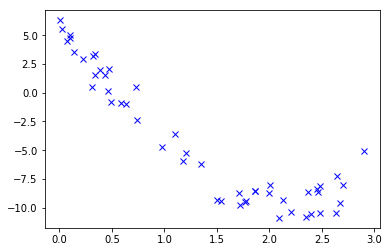

In [16]:
# Generate sample with error
x = 3 * random.rand(50)      # Make it between 0 and 3
e = 1 * random.randn(x.size) # Add some noise
#y = (0.1*x**3 + 0.5*x**2 + 2*x + 1) + e;  plot(x,y,'bo');
y = 10*cos(x+1) + e;  

# Plot
plot(x,y,'bx');

- Recall
> $\displaystyle Y = X \beta + \epsilon $
>
> $\displaystyle \hat\beta = (X^T X)^{-1} X^T Y = X^+ Y$

- Linear model $ \; f(x) = b_0 + b_1 x $

beta_hat: [ 3.18274823 -5.47705374]


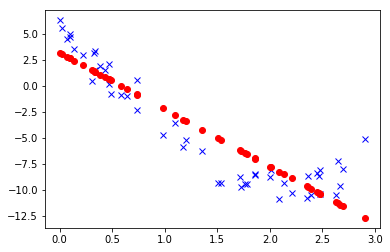

In [17]:
# Construct X matrix
X = ones((x.size,2));
X[:,1] = x

# Estimate beta and predict
Xpinv = dot(inv(dot(X.T,X)),X.T)
bHat = dot(Xpinv,y)
yHat = dot(X,bHat)

# Plot the true and predicted value
plot(x,y,'bx')
plot(x,yHat,'ro') 

print("beta_hat:", bHat)

beta_hat: [ 3.18274823 -5.47705374]


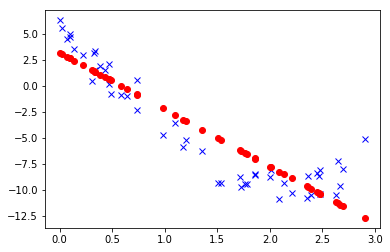

In [18]:
# Same using methods
Xpinv = inv(X.T.dot(X)).dot(X.T)
bHat = Xpinv.dot(y)
yHat = X.dot(bHat)

# Plot the true and predicted value
plot(x,y,'bx')
plot(x,yHat,'ro')

print("beta_hat:", bHat)

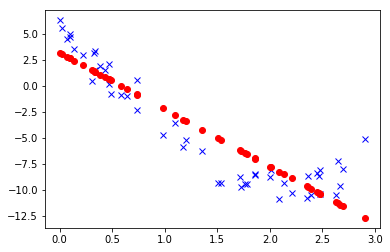

In [19]:
# Same again with pinv() and the Hat matrix
H = X.dot(linalg.pinv(X)) 
yHat = H.dot(y)

# Plot the true and predicted value
plot(x,y,'bx')
plot(x,yHat,'ro')

- Linear model $ \; f(x) = b_0 + b_1 x + b_2 x^2 $

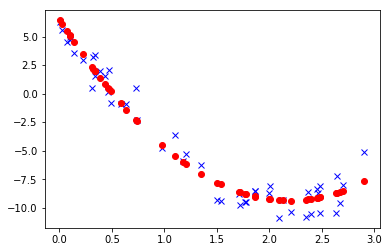

In [20]:
# Construct X matrix
X = ones( (x.size,3));
X[:,1] = x             # partials wrt. b1
X[:,2] = x*x           # wrt. b2

# Sames as before
bHatQ = linalg.pinv(X).dot(y)
yHatQ = X.dot(bHatQ)

# or like this
H = dot(X,linalg.pinv(X))
yHatQ = dot(H,y)

# Plot the true and predicted value
plot(x,y,'bx')
plot(x,yHatQ,'ro')

### Unhomework

0. Fit a 3rd order polynomial to the same data

0. Fit $f(x;\beta_0,\beta_1) = \beta_0\sin(x) + \beta_1\cos(x)$

0. Evaluate the best fits on a grid of 1000 equally-spaced points in $[-1,4]$

0. Plot them in one figure


### Heteroscedastic error

- Simple modification

>$\displaystyle C = \sum_{i=1}^N w_i \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k\right\}^2$
>
> yields
>
>$\displaystyle \sum_i w_i \left\{ y_i - \sum_{k} X_{ik} \hat\beta_k\ \right\}\, X_{il}  = 0$
>
>$\displaystyle \sum_i  X_{il} w_i y_i = \sum_k \left(\sum_i X_{il} w_i X_{ik}\right) \hat{\beta}_k$


- Diagonal weight matrix $W$

>$\displaystyle X^T W y = X^T W X \hat{\beta} $
>
>$\displaystyle \hat\beta = (X^T W X)^{-1} X^T W y $



### A Little Bit More

- It is always a good practice to write your own code to construct $ X $ matrix and estimate $ \beta $. But maybe you should also know that there are some functions in Python that could be convenient sometime (could also be used to double check your result).

- [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html): Generate polynomial and interaction features

In [21]:
from sklearn.preprocessing import PolynomialFeatures as poly

In [22]:
Y = np.arange(10) + random.randn(10)
Y

array([ 0.16151773,  0.6416825 ,  3.38079874,  2.12549052,  3.88434407,
        3.84071136,  3.82916263,  7.78996973,  8.66014733,  8.2653511 ])

In [23]:
X = np.arange(20).reshape(10, 2) + random.randn(10,2)
X

array([[  0.7448296 ,   1.75275506],
       [  1.2740931 ,   2.88621911],
       [  3.99953367,   2.46813722],
       [  5.4482849 ,   5.64852827],
       [  6.80605453,   9.49332331],
       [ 10.49889136,   9.21975814],
       [ 12.3259854 ,  11.79712956],
       [ 13.03726485,  14.57079365],
       [ 14.17468186,  17.4982057 ],
       [ 19.04144685,  20.4878488 ]])

> Construct $ \displaystyle [1, X_1, X_2, X_1^2, X_1 X_2, X_2^2] $

In [24]:
poly2 = poly(2)
X2 = poly2.fit_transform(X)
X2

array([[   1.        ,    0.7448296 ,    1.75275506,    0.55477113,
           1.30550385,    3.07215029],
       [   1.        ,    1.2740931 ,    2.88621911,    1.62331323,
           3.67731186,    8.33026077],
       [   1.        ,    3.99953367,    2.46813722,   15.99626954,
           9.8713979 ,    6.09170134],
       [   1.        ,    5.4482849 ,    5.64852827,   29.6838084 ,
          30.77479131,   31.90587164],
       [   1.        ,    6.80605453,    9.49332331,   46.32237824,
          64.6120761 ,   90.12318748],
       [   1.        ,   10.49889136,    9.21975814,  110.22671985,
          96.79723908,   85.00394013],
       [   1.        ,   12.3259854 ,   11.79712956,  151.92991606,
         145.41124673,  139.17226589],
       [   1.        ,   13.03726485,   14.57079365,  169.97027488,
         189.96329595,  212.30802759],
       [   1.        ,   14.17468186,   17.4982057 ,  200.92160593,
         248.03149894,  306.18720262],
       [   1.        ,   19.04144685,

> Construct $ \displaystyle [1, X_1, X_2, X_1 X_2] $

In [25]:
poly2 = poly(2, interaction_only=True)
X2 = poly2.fit_transform(X)
X2

array([[   1.        ,    0.7448296 ,    1.75275506,    1.30550385],
       [   1.        ,    1.2740931 ,    2.88621911,    3.67731186],
       [   1.        ,    3.99953367,    2.46813722,    9.8713979 ],
       [   1.        ,    5.4482849 ,    5.64852827,   30.77479131],
       [   1.        ,    6.80605453,    9.49332331,   64.6120761 ],
       [   1.        ,   10.49889136,    9.21975814,   96.79723908],
       [   1.        ,   12.3259854 ,   11.79712956,  145.41124673],
       [   1.        ,   13.03726485,   14.57079365,  189.96329595],
       [   1.        ,   14.17468186,   17.4982057 ,  248.03149894],
       [   1.        ,   19.04144685,   20.4878488 ,  390.11828415]])

- [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): Split arrays or matrices into random train and test subsets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2018)
print('X_train: \n', X_train)
print('X_test: \n', X_test)
print('Y_train: \n', Y_train)
print('Y_test: \n', Y_test)

X_train: 
 [[ 14.17468186  17.4982057 ]
 [ 19.04144685  20.4878488 ]
 [  6.80605453   9.49332331]
 [ 10.49889136   9.21975814]
 [  1.2740931    2.88621911]
 [  3.99953367   2.46813722]
 [ 12.3259854   11.79712956]]
X_test: 
 [[  0.7448296    1.75275506]
 [  5.4482849    5.64852827]
 [ 13.03726485  14.57079365]]
Y_train: 
 [ 8.66014733  8.2653511   3.88434407  3.84071136  0.6416825   3.38079874
  3.82916263]
Y_test: 
 [ 0.16151773  2.12549052  7.78996973]


- [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Ordinary least squares Linear Regression

In [28]:
from sklearn import linear_model

In [29]:
lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train);

In [30]:
lm.coef_

array([ 0.01077225,  0.37399507])

In [31]:
lm.intercept_

0.5926594555146556

In [32]:
lm.predict(X_test)

array([ 1.25620469,  2.76387147,  6.18250512])

> $ \displaystyle  R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2} $

In [33]:
# R^2 (must fit first)
lm.score(X_test, Y_test)  

0.86647689702497654

- [More on linear model](http://scikit-learn.org/stable/modules/linear_model.html)